In [2]:
# Make sure the environment is set up
import Pkg
Pkg.activate("..")
Pkg.instantiate()
Pkg.add("Distributions")
Pkg.add("Statistics")
Pkg.add("Random")
Pkg.add("Plots")

  Activating project at `~/projects/GeiloWinterSchoolUQ`
   Resolving package versions...
     Project No packages added to or removed from `~/projects/GeiloWinterSchoolUQ/Project.toml`
    Manifest No packages added to or removed from `~/projects/GeiloWinterSchoolUQ/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/projects/GeiloWinterSchoolUQ/Project.toml`
    Manifest No packages added to or removed from `~/projects/GeiloWinterSchoolUQ/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/projects/GeiloWinterSchoolUQ/Project.toml`
    Manifest No packages added to or removed from `~/projects/GeiloWinterSchoolUQ/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/projects/GeiloWinterSchoolUQ/Project.toml`
    Manifest No packages added to or removed from `~/projects/GeiloWinterSchoolUQ/Manifest.toml`


# First experiments with Monte Carlo integration in Julia

In this notebook, we will try some (hopefully) instructive examples of Monte Carlo integration using Julia. The goal is to familiarize yourself with Monte Carlo sampling techniques and how to implement them in Julia.

## Compute the integral of a function over a 1D interval

We start with a simple example: computing the integral of a function $f(x)$ over the interval $[0, 1]$. The integral can be approximated using Monte Carlo integration as follows:

$$I \approx \frac{1}{M} \sum_{i=1}^{M} f(X_i)$$

where $X_i$ are uniformly distributed random samples in the interval $[0, 1]$ and $M$ is the number of samples. Here, we set $f(x) = \sin(\pi x)$.

**Exercise: Adjust the number of samples M and observe how the accuracy of the integral estimate changes. What happens if you rerun?**

In [3]:
using Random
using Statistics

f(x) = sin(pi * x)

M = 10000  # Number of samples
approximate_integral = 0.0
for i in 1:M
    x = rand()  # Sample uniformly in [0, 1]
    approximate_integral += f(x)
end
approximate_integral /= M  # Average over samples
println("Estimated integral of sin(πx) over [0, 1]: ", approximate_integral)
println("Exact integral: ", 2 / pi)



Estimated integral of sin(πx) over [0, 1]: 0.6326121713706921
Exact integral: 0.6366197723675814


## Exercise: Approximate $\pi$ using Monte Carlo integration

We can approximate the value of $\pi$ using Monte Carlo integration by estimating the area of a circle with radius 1. The area of the circle is $\pi$, and we can estimate this area by randomly sampling points in the unit square and determining the fraction that falls within the circle. That is, we can use the following formula:
$$\pi = \int_{-1}^{1} \int_{-1}^{1} \mathbb{1}_{x^2 + y^2 \leq 1} \, dx \, dy \approx \frac{1}{M} \sum_{i=1}^M \mathbb{1}_{x_i^2 + y_i^2 \leq 1} (X_i, Y_i) \qquad  X_i, Y_i \sim \mathcal{U}[-1,1]$$
where $\mathbb{1}_{x^2 + y^2 \leq 1}$ is an indicator function that is 1 if the point $(x, y)$ is inside the unit circle and 0 otherwise.

In [4]:
using Random
using Statistics
using Distributions

# Define the function to integrate
I(x, y) = x^2 + y^2 <= 1 ? 1.0 : 0.0

M = 10000  # Number of samples
approximate_pi = 0.0
for i in 1:M
    x = rand(Uniform(-1, 1))  # Sample x uniformly in [-1, 1]
    y = rand(Uniform(-1, 1))  # Sample y uniformly in [-1, 1]
    approximate_pi += I(x, y)
end
approximate_pi = (approximate_pi / M) * 4  # Scale by area
println("Estimated value of π: ", approximate_pi)
println("Exact value of π: ", Float64(pi))


Estimated value of π: 3.1316
Exact value of π: 3.141592653589793


## Measuring convergence
We can study the convergence of our Monte Carlo estimates by running multiple simulations with increasing numbers of samples and observing how the estimates approach the true value. For each number of samples, we can compute the estimate and plot the results to visualize convergence.

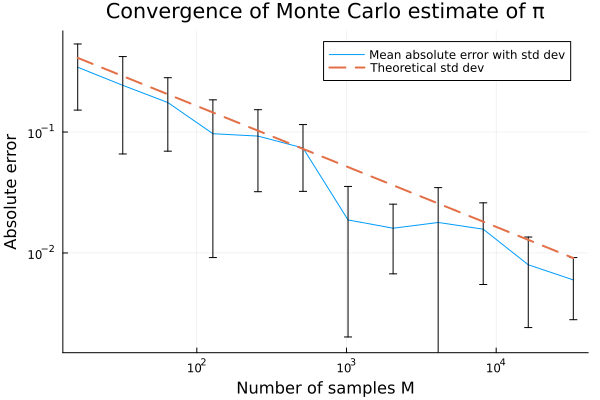

In [10]:
using Random
using Statistics
using Distributions
using Plots
M_values = collect(2 .^ (4:15))
reruns = 10
errors = zeros(length(M_values), reruns)
for (j, M) in enumerate(M_values)
    for r in 1:reruns
        approximate_pi = 0.0
        for i in 1:M
            x = rand(Uniform(-1, 1))  # Sample x uniformly in [-1, 1]
            y = rand(Uniform(-1, 1))  # Sample y uniformly in [-1, 1]
            approximate_pi += x.^2 + y.^2 <= 1 ? 1.0 : 0.0
        end
        approximate_pi = (approximate_pi / M)  * 4 # Scale by area
        errors[j, r] = abs(approximate_pi - pi)
    end
end

mean_errors = mean(errors, dims=2)
std_errors = std(errors, dims=2)

plot(M_values, mean_errors[:], yerror=std_errors[:], xscale=:log10, yscale=:log10,
     xlabel="Number of samples M", ylabel="Absolute error",
     title="Convergence of Monte Carlo estimate of π",
     label="Mean absolute error with std dev",
     legend=:topright)
variance = pi/4 - pi^2 / 16
theoretical_std = 4 * sqrt.(variance ./ M_values)
ylims!(minimum(mean_errors) / 4, maximum(mean_errors) * 2)
plot!(M_values, theoretical_std, lw=2, ls=:dash, label="Theoretical std dev")